<a href="https://colab.research.google.com/github/Vadlamudi-Jyothsna/CVIP/blob/main/Mobile_Price_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
data = pd.read_csv("train.csv")

In [25]:
data.head() #Display first top 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [26]:
data.shape #Out dataset have 2000 rows with 21 columns

(2000, 21)

In [27]:
data.info() #Display all columns information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [28]:
data.isnull().sum() #This function return sum of null values of columns.

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [29]:
data.duplicated().any() #Returns is any duplicates rows has in our dataset.

False

<Axes: xlabel='blue', ylabel='count'>

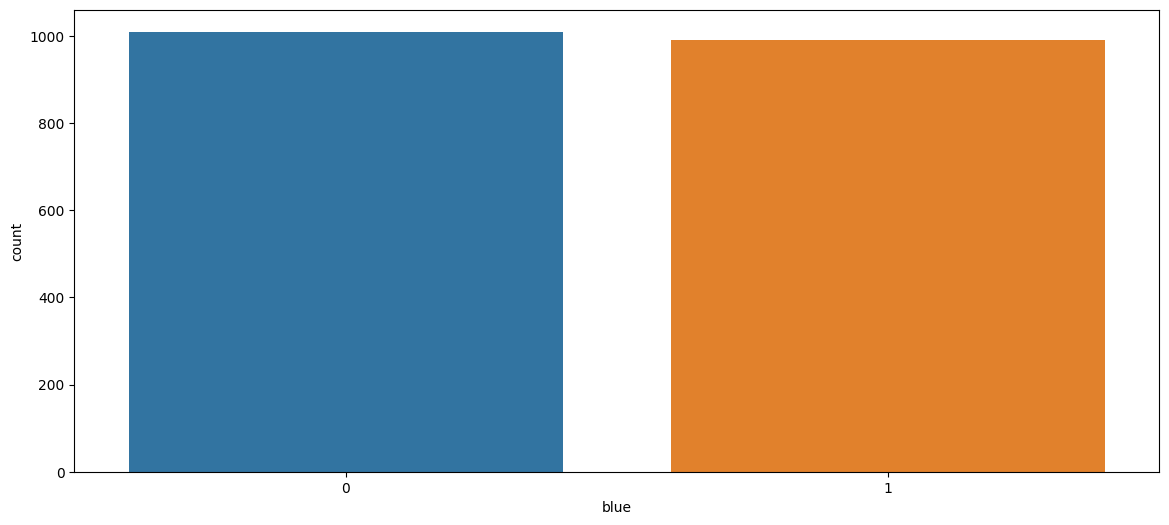

In [30]:
plt.figure(figsize=(14,6))
sns.countplot(data = data ,x= data['blue'])

In [31]:
data.fc.value_counts().head()

0    474
1    245
2    189
3    170
5    139
Name: fc, dtype: int64

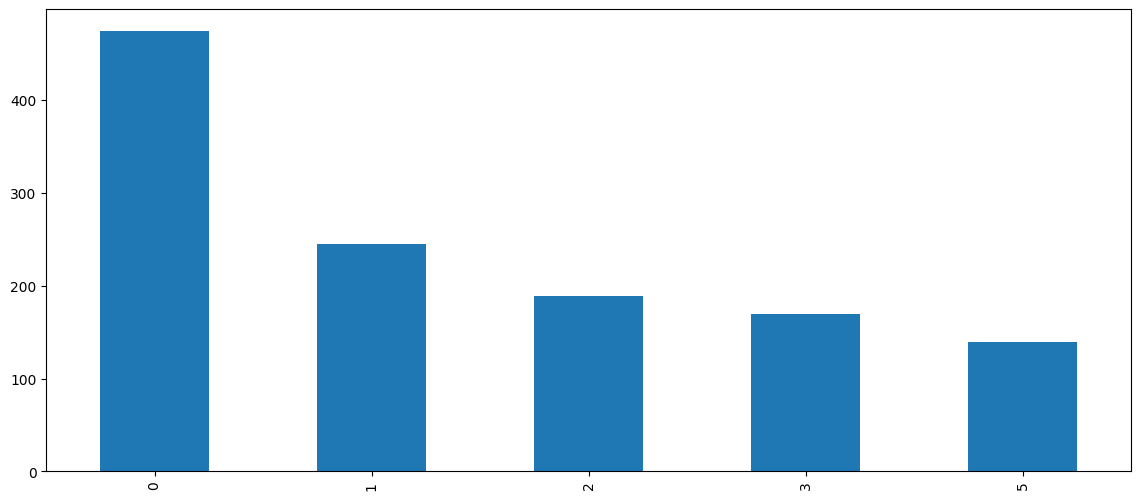

In [32]:
plt.figure(figsize=(14,6))
data.fc.value_counts().head().plot(kind = 'bar')
plt.show()

In [33]:
data.corr().T

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,...,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,...,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,...,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,...,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,...,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,...,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,...,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,...,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,...,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,...,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


In [34]:
data['n_cores'].value_counts()

4    274
7    259
8    256
2    247
3    246
5    246
1    242
6    230
Name: n_cores, dtype: int64

<Axes: xlabel='n_cores', ylabel='price_range'>

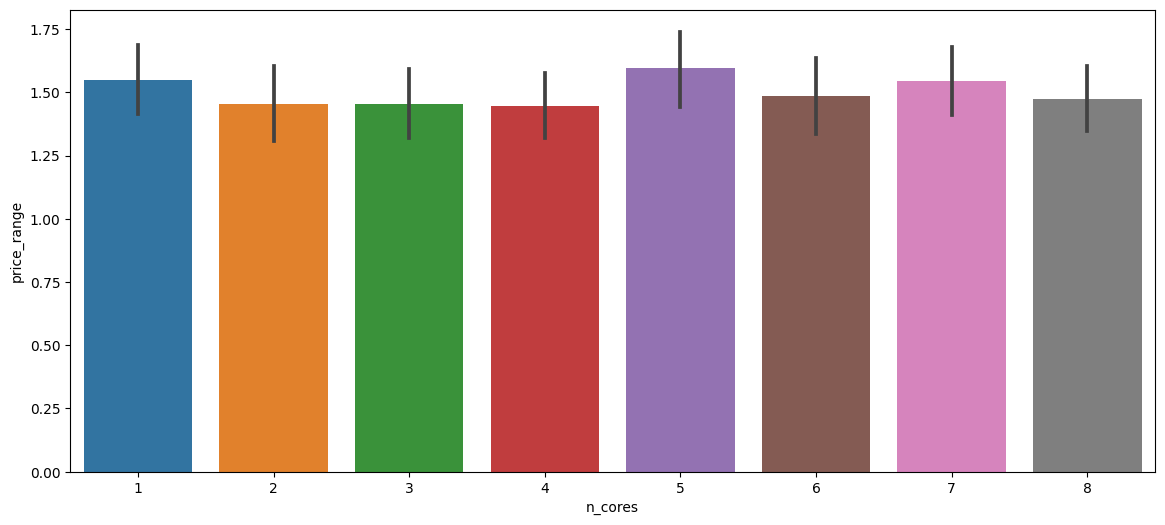

In [36]:
plt.figure(figsize=(14,6))
sns.barplot(x = "n_cores",  y = "price_range", data = data)

In [37]:
data.four_g.value_counts()

1    1043
0     957
Name: four_g, dtype: int64

<Axes: >

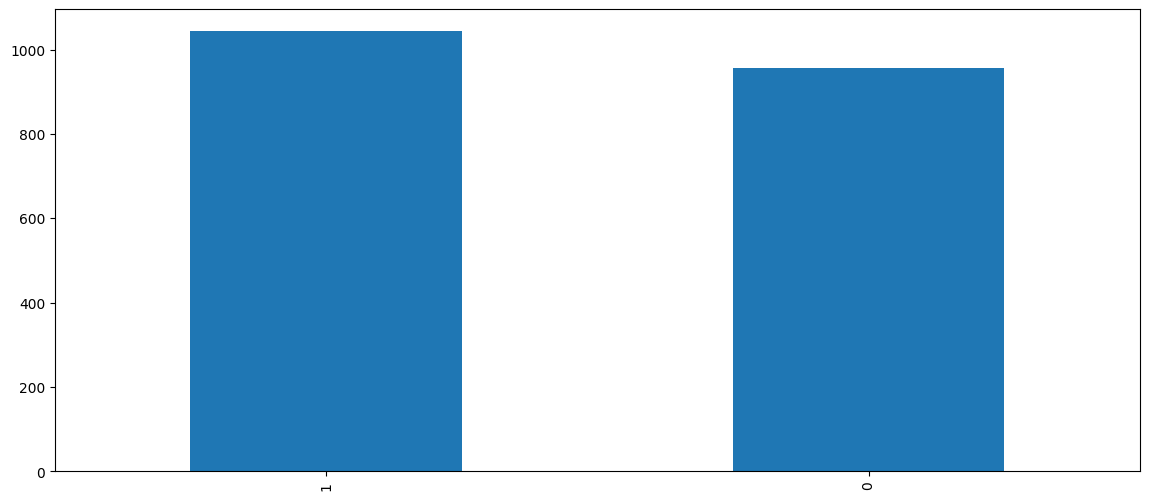

In [38]:
plt.figure(figsize=(14,6))
data.four_g.value_counts().plot(kind = 'bar')

<Axes: >

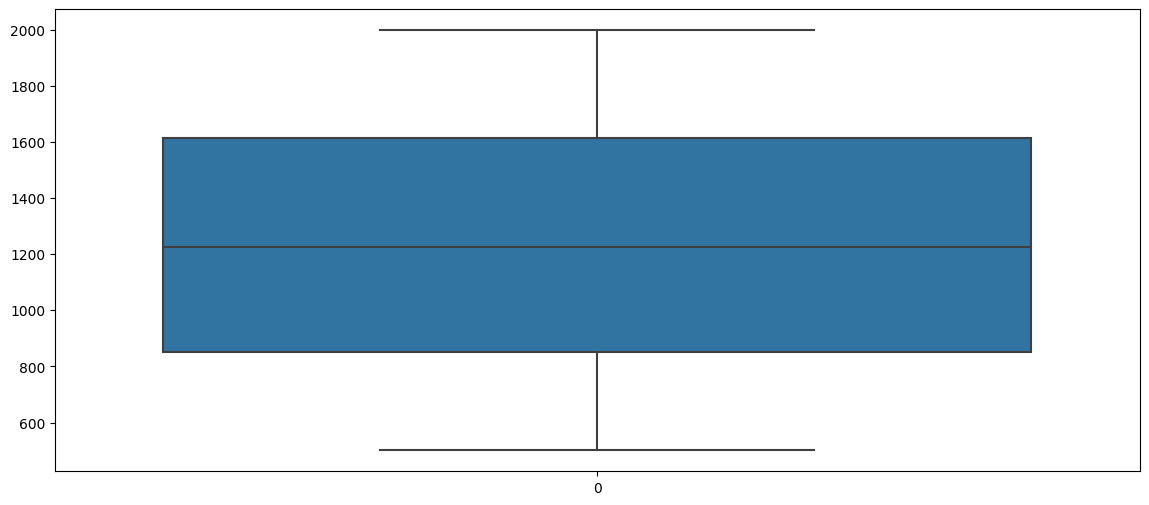

In [39]:
plt.figure(figsize=(14,6))
sns.boxplot(data.battery_power)

In [40]:
data['price_range'].value_counts() # How many Unique value of price_range columns.

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

<Axes: xlabel='price_range'>

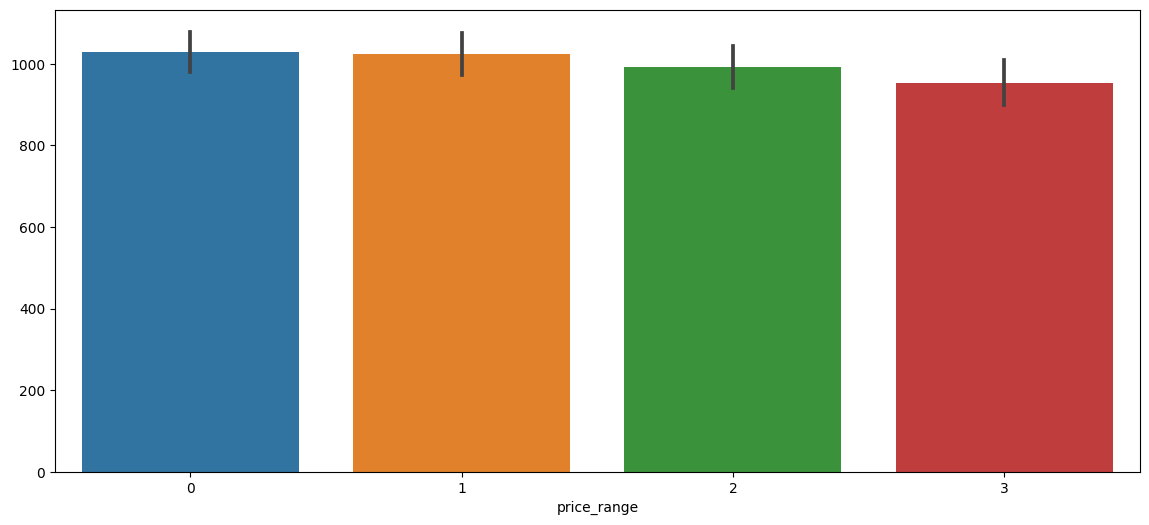

In [41]:
plt.figure(figsize=(14,6))
sns.barplot(data = data , x  =data['price_range'] , y =data.price_range.index )

<Axes: xlabel='talk_time', ylabel='price_range'>

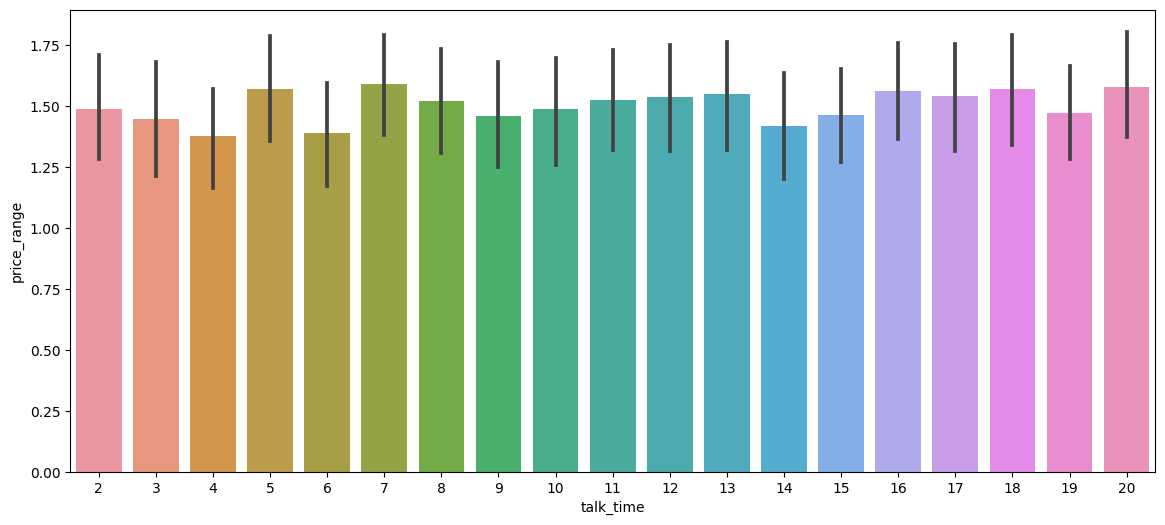

In [42]:
plt.figure(figsize=(14,6))
sns.barplot(data = data , x ='talk_time' , y= 'price_range' )

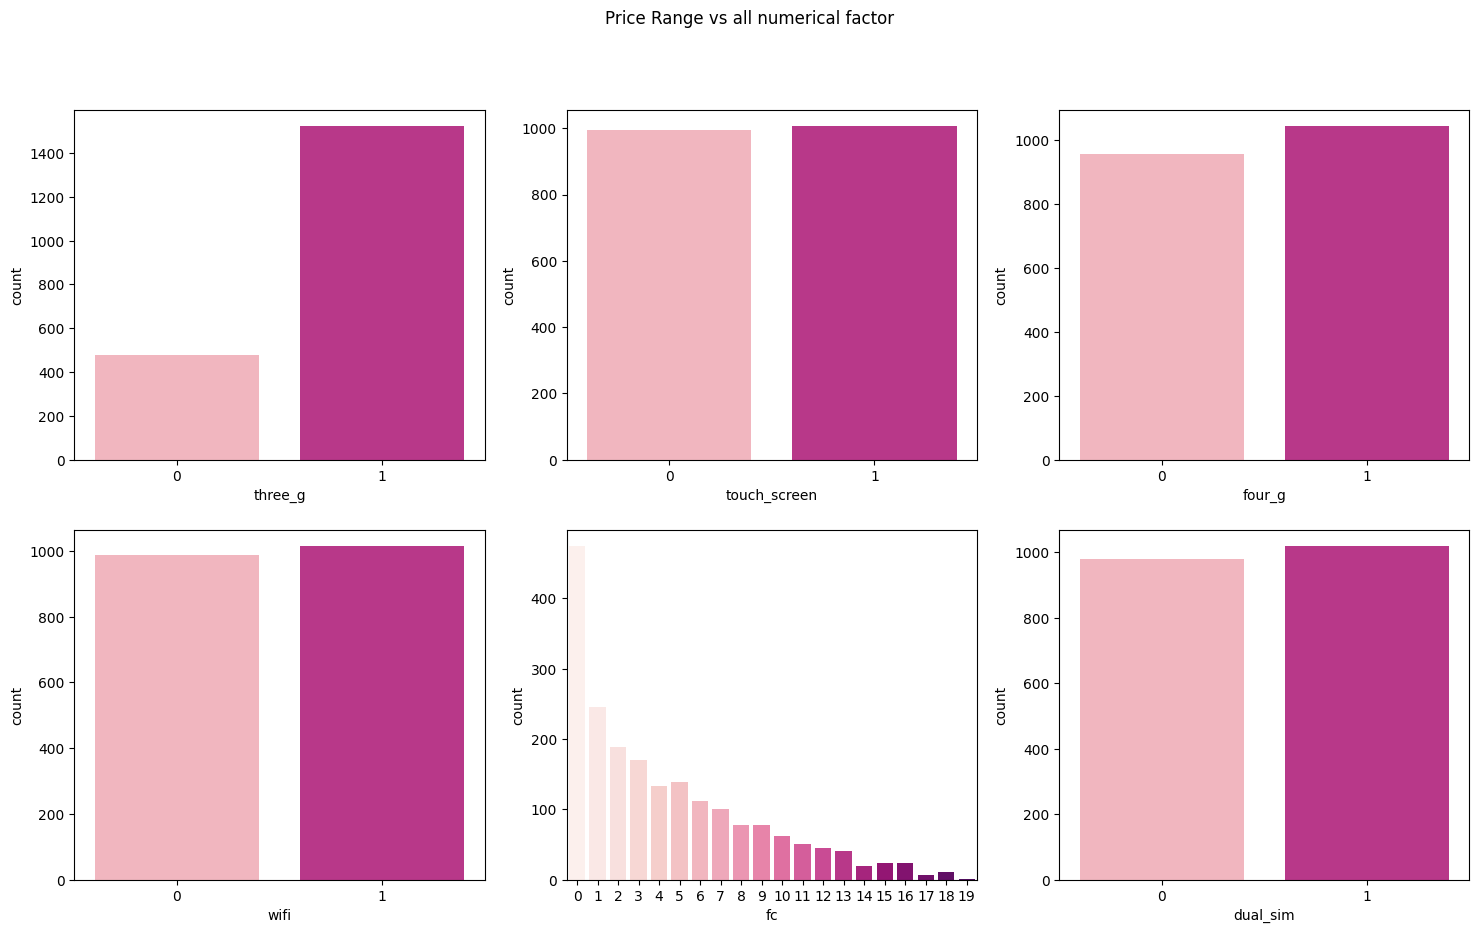

In [43]:
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Price Range vs all numerical factor')
sns.countplot(ax=axes[0, 0], data=data, x='three_g',palette='RdPu')
sns.countplot(ax=axes[0, 1], data=data, x='touch_screen',palette='RdPu')
sns.countplot(ax=axes[0, 2], data=data, x='four_g',palette='RdPu')
sns.countplot(ax=axes[1, 0], data=data, x='wifi',palette='RdPu')
sns.countplot(ax=axes[1,1],data = data, x ='fc' ,palette='RdPu')
sns.countplot(ax=axes[1,2],data = data, x ='dual_sim',palette='RdPu' )
plt.show()

In [44]:
x = data.drop('price_range',axis=1) # x variable stores the independent variables.
y = data['price_range'] #y store the dependent variable.

In [45]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [46]:
ordered_rank_features = SelectKBest(score_func=chi2,k=20)
ordered_feature = ordered_rank_features.fit(x,y)

In [47]:
dfscores = pd.DataFrame(ordered_feature.scores_,columns=["Score"])
dfcolumns = pd.DataFrame(x.columns)

In [48]:
features_rank=pd.concat([dfcolumns,dfscores],axis=1)
features_rank.columns=['Features','Score']
features_rank

,Features,Score
0,battery_power,14129.866576
1,blue,0.723232
2,clock_speed,0.648366
3,dual_sim,0.631011
4,fc,10.135166
5,four_g,1.521572
6,int_memory,89.839124
7,m_dep,0.745820
8,mobile_wt,95.972863
9,n_cores,9.097556


In [49]:
features_rank.nlargest(10,'Score')

,Features,Score
13,ram,931267.519053
11,px_height,17363.569536
0,battery_power,14129.866576
12,px_width,9810.586750
8,mobile_wt,95.972863
6,int_memory,89.839124
15,sc_w,16.480319
16,talk_time,13.236400
4,fc,10.135166
14,sc_h,9.614878


In [50]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(x,y)

ExtraTreesClassifier()

In [51]:
print(model.feature_importances_)

[0.06137276 0.0195042  0.03392714 0.02005525 0.03247497 0.0164396
 0.03426185 0.03250489 0.03599305 0.03252611 0.0329486  0.04711074
 0.04761122 0.39851309 0.0337577  0.0336538  0.03477364 0.01369376
 0.01884019 0.02003744]


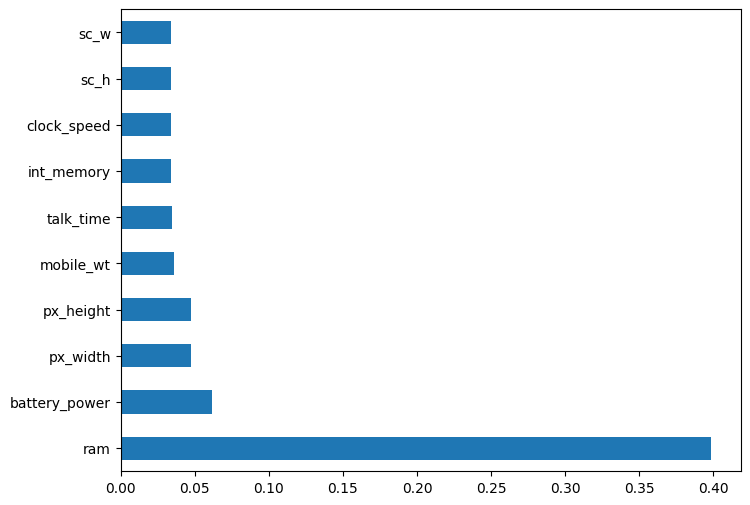

In [52]:
ranked_features=pd.Series(model.feature_importances_,index=x.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [53]:
from sklearn.feature_selection import mutual_info_classif
mutual_info=mutual_info_classif(x,y)
mutual_data=pd.Series(mutual_info,index=x.columns)
mutual_data.sort_values(ascending=False)

ram              0.850436
px_width         0.030980
px_height        0.029025
battery_power    0.025640
touch_screen     0.018598
clock_speed      0.012770
mobile_wt        0.011696
int_memory       0.011569
blue             0.009772
sc_w             0.008071
wifi             0.003029
dual_sim         0.002950
m_dep            0.001670
n_cores          0.000000
four_g           0.000000
sc_h             0.000000
fc               0.000000
talk_time        0.000000
three_g          0.000000
pc               0.000000
dtype: float64

In [54]:
data = data.drop(['wifi','touch_screen','three_g','talk_time','sc_w','dual_sim','four_g','int_memory','blue','n_cores','mobile_wt','m_dep','fc'],axis=1)


In [55]:
data.head()

,battery_power,clock_speed,pc,px_height,px_width,ram,sc_h,price_range
0,842,2.2,2,20,756,2549,9,1
1,1021,0.5,6,905,1988,2631,17,2
2,563,0.5,6,1263,1716,2603,11,2
3,615,2.5,9,1216,1786,2769,16,2
4,1821,1.2,14,1208,1212,1411,8,1


In [56]:
x = data.drop('price_range',axis=1)
y = data['price_range']

In [57]:
print(x.shape)
print(y.shape)

(2000, 7)
(2000,)


In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)

In [59]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1500, 7)
(500, 7)
(1500,)
(500,)


In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [61]:
X_train

array([[-1.58954736, -0.54409463,  0.69550098, ...,  1.47195821,
         0.79794809,  1.11590168],
       [-1.06204271, -0.42202734, -1.28723859, ..., -1.73439382,
         0.97495824,  1.35539982],
       [ 1.31059626, -0.29996004,  0.86072928, ...,  0.65885313,
         1.15196839,  1.35539982],
       ...,
       [-0.09759213,  0.55451104, -1.45246689, ...,  0.87998086,
         1.4053724 ,  0.15790911],
       [-0.09532817,  1.04278023, -0.4610971 , ...,  1.26465096,
        -1.00010238,  0.39740725],
       [-1.19335288, -1.27649842,  1.52164247, ..., -0.75083612,
         0.29579825, -1.0395816 ]])

In [62]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [63]:
y_pred = classifier.predict(X_test)

In [64]:
print(y_pred)

[3 0 2 2 2 0 0 3 3 1 1 3 0 2 3 0 3 2 2 1 0 0 3 1 2 2 3 1 3 1 1 0 2 0 2 3 0
 0 3 3 2 1 3 3 1 3 0 1 2 1 1 3 0 3 0 2 2 2 0 3 3 1 3 2 1 2 3 2 2 2 3 2 1 0
 1 3 2 2 1 2 3 3 3 0 0 0 2 1 2 3 1 2 2 1 0 3 3 3 0 3 1 1 3 1 3 2 2 3 2 3 3
 0 0 1 3 3 0 0 1 0 0 3 2 2 1 1 1 1 0 2 1 3 3 3 3 3 3 2 0 1 1 2 1 3 0 3 0 0
 2 0 1 1 1 1 3 0 0 3 1 3 2 1 3 1 2 3 3 2 1 0 3 1 2 3 3 0 2 2 3 1 2 1 0 1 2
 1 2 0 3 3 1 1 0 2 3 0 1 2 2 0 3 3 2 1 2 3 3 3 0 0 0 2 3 3 0 0 1 3 1 3 3 3
 0 0 2 2 3 1 0 2 0 0 0 3 3 1 2 2 1 1 0 2 3 3 0 0 1 3 3 2 3 0 3 1 1 0 2 3 3
 2 0 0 1 2 3 2 2 3 1 1 0 3 3 2 1 3 2 2 2 1 0 2 2 1 0 0 2 2 2 2 0 1 3 0 1 2
 3 0 2 0 1 1 3 0 0 2 3 1 2 0 2 0 3 0 3 3 2 3 1 2 2 1 1 1 0 1 0 3 1 0 3 1 0
 1 3 0 3 1 2 0 1 3 0 2 1 1 2 1 1 0 2 0 0 3 1 2 3 2 2 0 3 2 1 1 3 2 3 3 3 0
 2 0 3 0 1 1 2 3 1 3 1 2 0 1 2 3 0 0 1 3 0 3 0 1 2 1 1 0 2 1 0 1 3 0 3 3 0
 2 1 3 1 1 3 2 0 3 2 2 0 0 3 0 1 1 1 3 2 3 2 0 3 0 0 1 3 0 0 3 2 2 2 3 0 0
 1 2 1 2 0 3 3 0 2 3 0 2 2 1 0 2 2 1 3 2 2 0 2 0 3 3 2 1 0 3 1 2 0 0 1 3 0
 3 0 0 1 2 0 1 3 0 2 2 1 

In [65]:
from sklearn.metrics import accuracy_score
acc1 = accuracy_score(y_test, y_pred)
print(f"Accuracy score: {acc1}")

Accuracy score: 0.956


In [66]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)

SVC(kernel='linear', random_state=0)

In [67]:
y_pred = classifier.predict(X_test)

In [68]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
acc2 = accuracy_score(y_test, y_pred)

[[120   4   0   0]
 [  3 105   2   0]
 [  0   4 115   6]
 [  0   0   6 135]]


In [69]:
print(f"Accuracy score: {acc2}")

Accuracy score: 0.95


In [70]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
y_pred = classifier.predict(X_test)


In [72]:
from sklearn.metrics import  accuracy_score
acc3 = accuracy_score(y_test, y_pred)

In [73]:
print(f"Accuracy score: {acc3}")

Accuracy score: 0.77


In [74]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB()

In [ ]:
y_pred = classifier.predict(X_test)

In [ ]:
from sklearn.metrics import  accuracy_score
acc4 = accuracy_score(y_test, y_pred)

In [ ]:
print(f"Accuracy score : {acc4}")

In [ ]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
classifier.fit(X_train, y_train)

In [75]:
y_pred = classifier.predict(X_test)

In [76]:
from sklearn.metrics import  accuracy_score
acc5 = accuracy_score(y_test, y_pred)

In [77]:
print(f"Accuracy score: {acc5}")

Accuracy score: 0.828


In [82]:
mylist=[]
mylist2=[]
mylist.append(acc1)
mylist2.append("Logistic Regression")
mylist.append(acc2)
mylist2.append("SVM")
mylist.append(acc3)
mylist2.append("KNN")
mylist.append("acc4")
mylist2.append("Naive Bayes")
mylist.append(acc5)
mylist2.append("DTR")

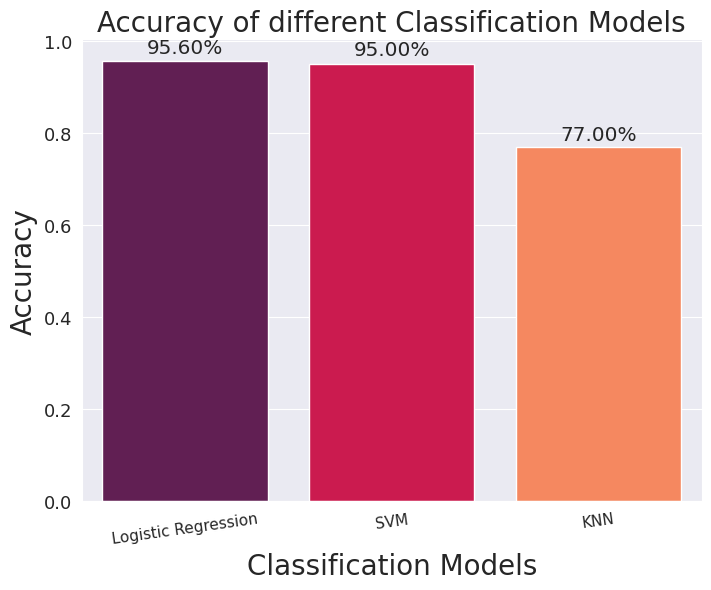

In [80]:
plt.rcParams['figure.figsize']=8,6
sns.set_style("darkgrid")
ax = sns.barplot(x=mylist2, y=mylist, palette = "rocket", saturation =1.5)
plt.xlabel("Classification Models", fontsize = 20 )
plt.ylabel("Accuracy", fontsize = 20)
plt.title("Accuracy of different Classification Models", fontsize = 20)
plt.xticks(fontsize = 11, horizontalalignment = 'center', rotation = 8)
plt.yticks(fontsize = 13)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.2%}', (x + width/2, y + height*1.02), ha='center', fontsize = 'x-large')
plt.show()